In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures ,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import Pipeline

In [4]:
data=pd.read_csv("C:/Users/USER/Downloads/3-customersatisfaction.csv")

In [5]:
data.head()

,Unnamed: 0,Customer Satisfaction,Incentive
0,0,-1.282447,1.010513
1,1,0.425298,2.281043
2,2,1.953070,4.415053
3,3,2.625838,10.563600
4,4,-1.426333,0.627365


In [6]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [7]:
data.head()

,Customer Satisfaction,Incentive
0,-1.282447,1.010513
1,0.425298,2.281043
2,1.953070,4.415053
3,2.625838,10.563600
4,-1.426333,0.627365


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Satisfaction  100 non-null    float64
 1   Incentive              100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [9]:
data.isnull().sum()

Customer Satisfaction    0
Incentive                0
dtype: int64

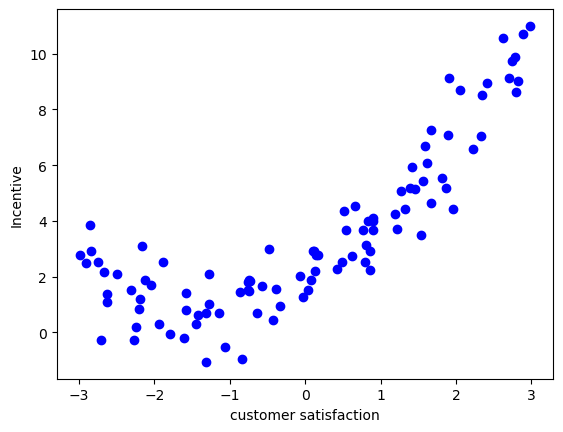

In [11]:
plt.scatter(data["Customer Satisfaction"],data["Incentive"],color="b")
plt.xlabel("customer satisfaction")
plt.ylabel("Incentive")
plt.show()
##grafiğe bakildiğinda polinom regresona benzediğini görüyoruz.

In [14]:
X=data[["Customer Satisfaction"]]
y=data["Incentive"]

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15)

In [18]:
regression=LinearRegression()


In [19]:
scaler=StandardScaler()

In [20]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [21]:
regression.fit(X_train,y_train)

LinearRegression()

In [22]:
y_pred=regression.predict(X_test)

In [25]:
score=r2_score(y_test,y_pred)
score

0.2705652535622244

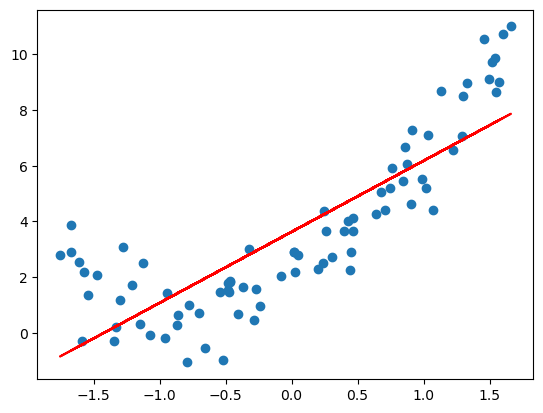

In [28]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),color="r")
plt.show()

In [29]:
#linear regression olmadığı için polinom regression deniyoruz.

In [63]:
poly=PolynomialFeatures(degree=2,include_bias=True)

In [64]:
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [65]:
regression=LinearRegression()
regression.fit(X_train_poly,y_train)


LinearRegression()

In [70]:
y_pred=regression.predict(X_test_poly)
r2score=r2_score(y_test,y_pred)
print("r2 score:",r2score)

r2 score: 0.7685687698788557


In [71]:
regression.coef_

array([0.        , 2.63871762, 1.54959954])

In [72]:
regression.intercept_

2.076676429793282

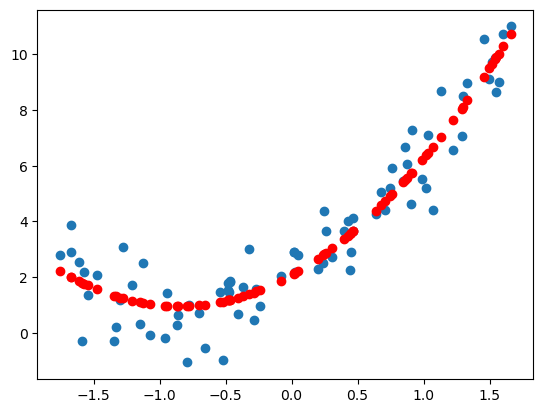

In [73]:
plt.scatter(X_train,y_train)
plt.scatter(X_train,regression.predict(X_train_poly),color="r")
plt.show()

In [74]:
#degree=3 deneyicem.

In [75]:
poly_3=PolynomialFeatures(degree=3,include_bias=True)
X_train_polyy=poly_3.fit_transform(X_train)
X_test_polyy=poly_3.transform(X_test)

In [76]:
regression=LinearRegression()
regression.fit(X_train_polyy,y_train)

LinearRegression()

In [78]:
y_poly_pred=regression.predict(X_test_polyy)
score=r2_score(y_test,y_poly_pred)
print("r2score:",score)

r2score: 0.757344362140105


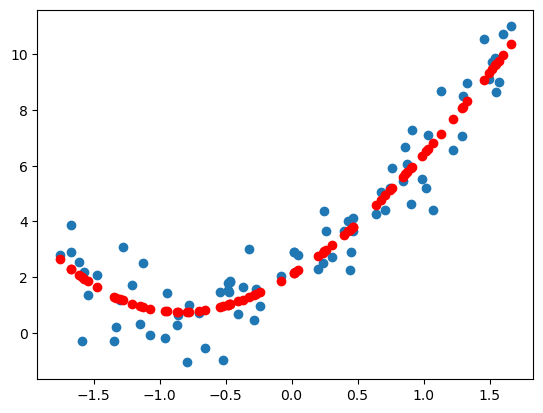

In [80]:
plt.scatter(X_train,y_train)
plt.scatter(X_train,regression.predict(X_train_polyy),color="r")
plt.show()

In [81]:
#new data



In [82]:
new_df=pd.read_csv("C:/Users/USER/Downloads/3-newdatas.csv")

In [88]:
new_df

,Customer Satisfaction
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [84]:
new_df.rename(columns={"0":"Customer Satisfaction"},inplace=True)

In [87]:
X_new=new_df[["Customer Satisfaction"]]

In [89]:
X_new

,Customer Satisfaction
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [93]:
X_new=scaler.fit_transform(X_new)


In [96]:
X_new_poly=poly_3.transform(X_new)

In [97]:
y_new=regression.predict(X_new_poly)

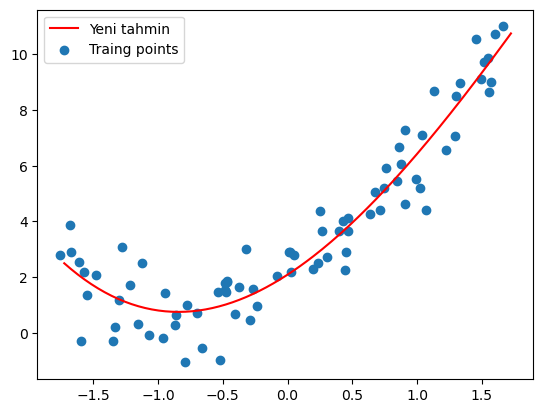

In [103]:
plt.plot(X_new,y_new,"r",label="Yeni tahmin")
plt.scatter(X_train,y_train,label="Traing points")
plt.legend()
plt.show()


In [118]:
def poly_regression(degree):
    poly_features=PolynomialFeatures(degree=degree)
    lin_reg=LinearRegression()
    scaler=StandardScaler()
    pipeline=Pipeline([
        ("standard_scaler",scaler),
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    pipeline.fit(X_train,y_train)
    score=pipeline.score(X_test,y_test)
    print("r2 score:",score)
    
    y_pred_new=pipeline.predict(X_new)
    plt.plot(X_new,y_pred_new,"r",label="Yeni tahmin")
    plt.scatter(X_train,y_train,label="Traing points")
    plt.legend()
    plt.show()

r2 score: 0.2705652535622246


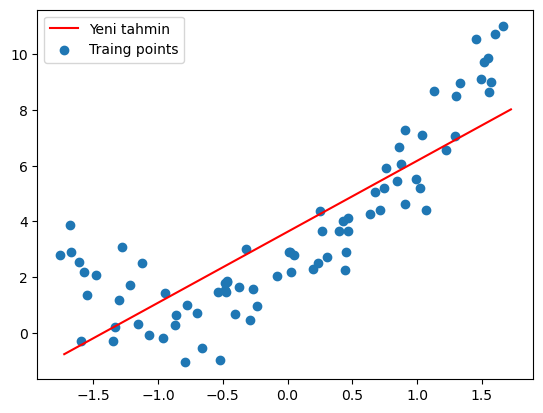

r2 score: 0.7685687698788558


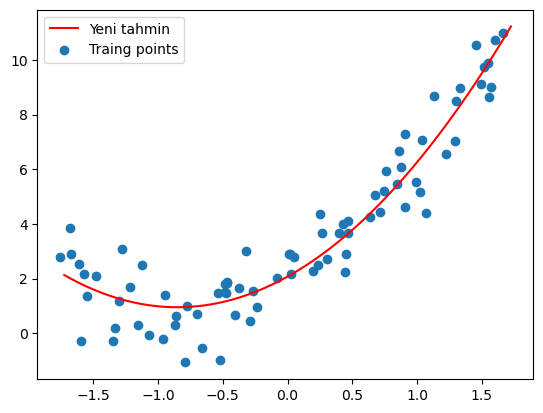

r2 score: 0.757344362140105


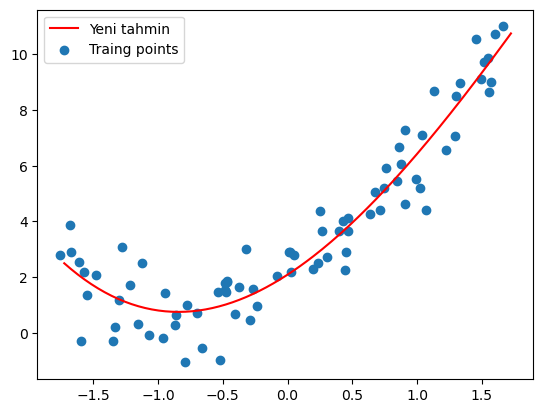

r2 score: 0.7355034443260415


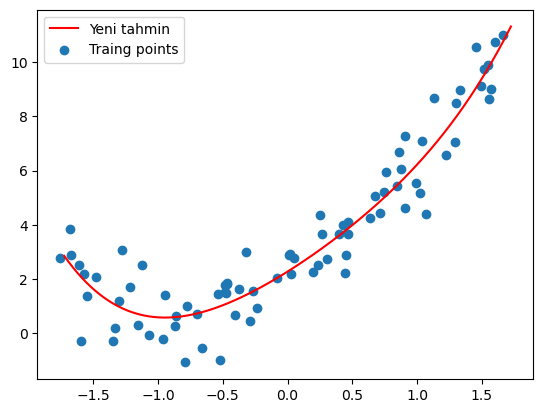

r2 score: 0.7351244165095399


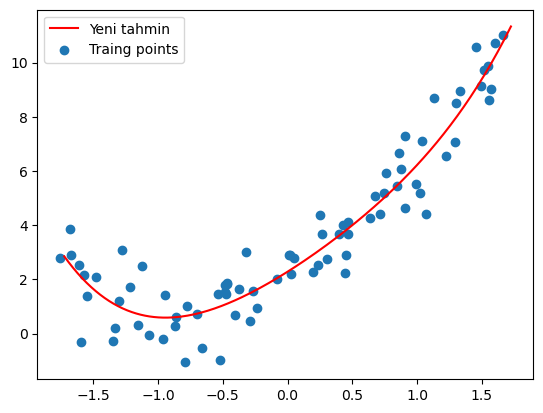

r2 score: 0.7343590482133429


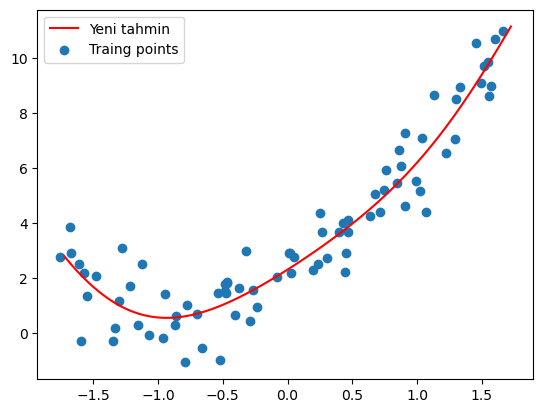

r2 score: 0.7347819263549453


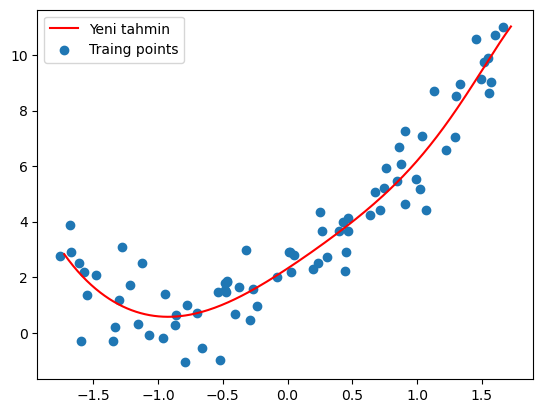

r2 score: 0.7411422099998382


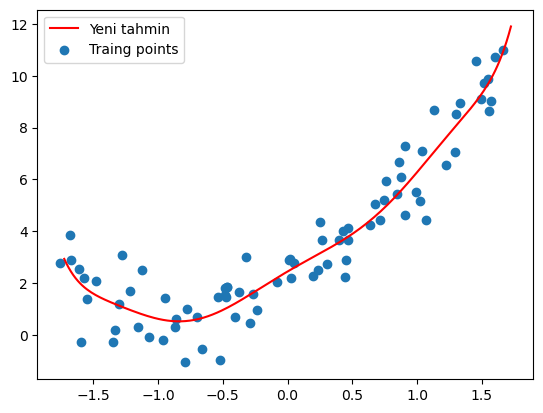

r2 score: 0.7310763879815942


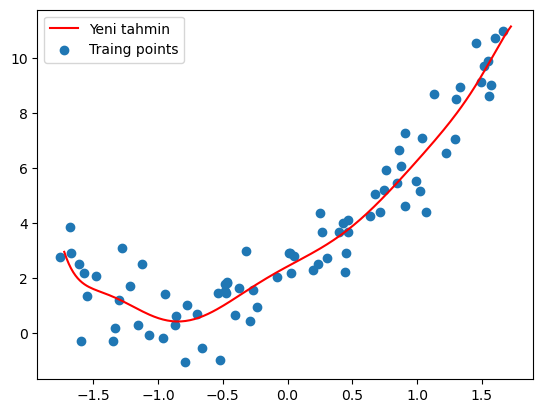

r2 score: 0.7280578621232846


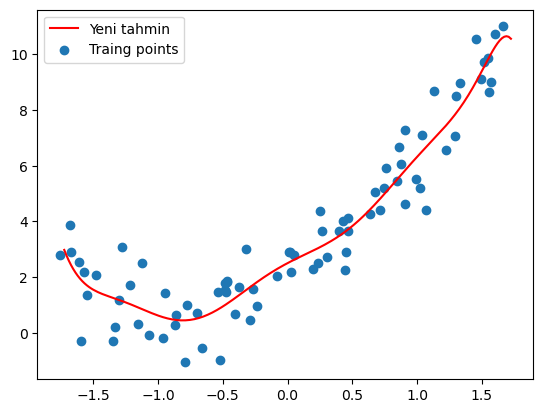

In [119]:
for degree in [1,2,3,4,5,6,7,8,9,10]:
    poly_regression(degree)